In [22]:
%matplotlib inline

# import all modules
import sys
import os
import itertools

import IPython.display as ipd
from python_speech_features import mfcc, logfbank
from scipy.io import wavfile
import pandas as pd
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, LabelBinarizer, StandardScaler

import fma_utils as fma_utils

plt.rcParams['figure.figsize'] = (17, 5)



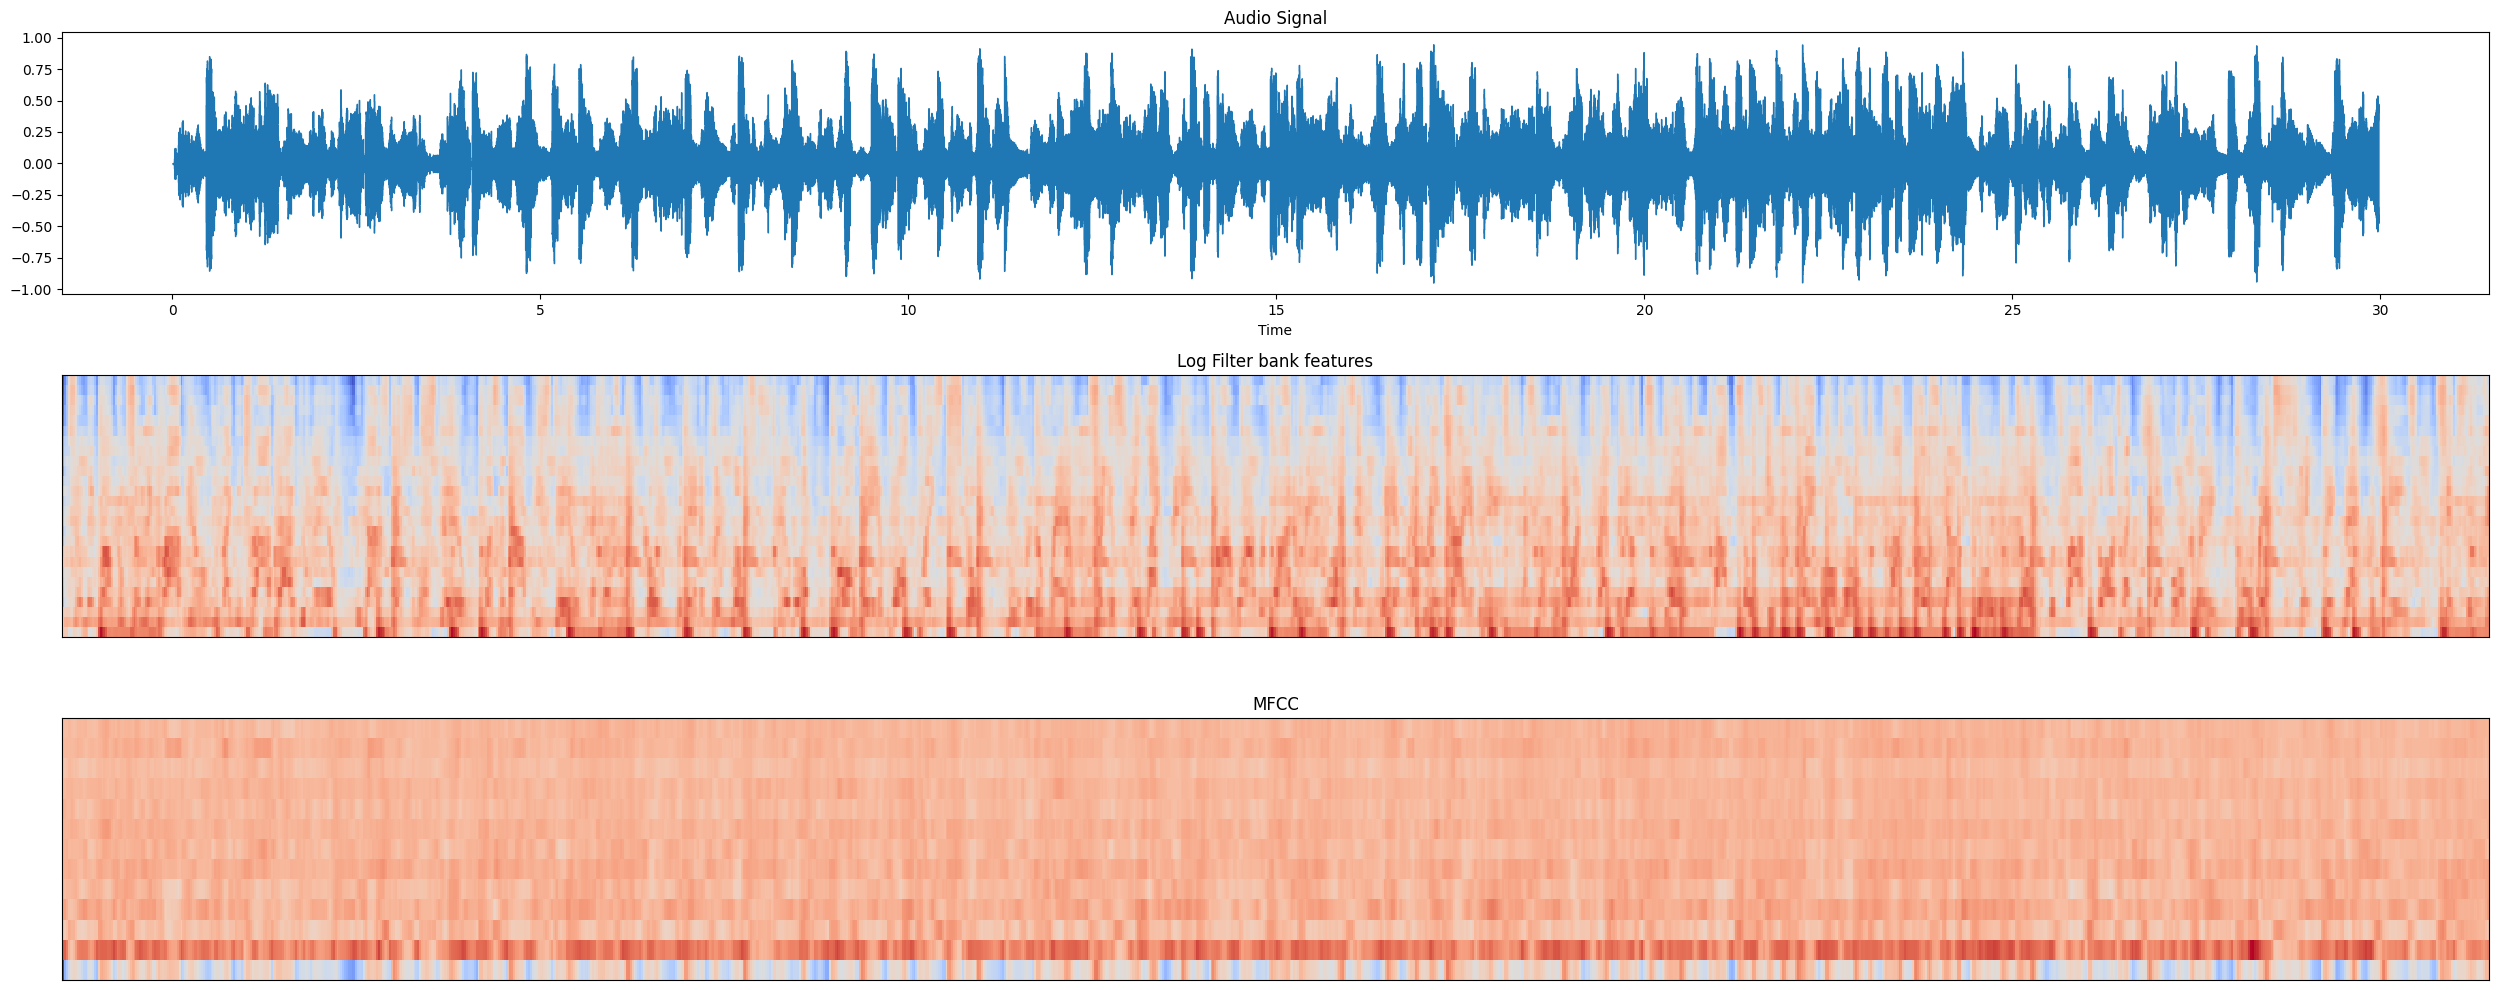

In [23]:
AUDIO_DIR = '../../dataset_process/data/fma_small'
path = fma_utils.get_audio_path(AUDIO_DIR, 2)

audio, sampling_freq = librosa.load(path)

# Extract MFCC features
mfcc_features = librosa.feature.mfcc(y=audio, sr=sampling_freq, n_mfcc=13)

# Extract filter bank features
filterbank_features = librosa.feature.melspectrogram(y=audio, sr=sampling_freq, n_mels=26)
log_filterbank_features = librosa.power_to_db(filterbank_features)

# Plot the features with bigger size
plt.figure(figsize=(25, 10))
plt.subplot(3, 1, 1)
librosa.display.waveshow(audio, sr=sampling_freq)
plt.title('Audio Signal')
plt.subplot(3, 1, 2)
librosa.display.specshow(log_filterbank_features, sr=sampling_freq)
plt.title('Log Filter bank features')
plt.subplot(3, 1, 3)
librosa.display.specshow(mfcc_features, sr=sampling_freq)
plt.title('MFCC')
plt.tight_layout()
plt.show()


In [24]:
print ('\nMFCC:\nLength of each feature =', mfcc_features.shape[0])
print ('Number of windows =', mfcc_features.shape[1])
print ('\nFilter bank:\nLength of each feature =', filterbank_features.shape[0])
print ('Number of windows =', filterbank_features.shape[1])


MFCC:
Length of each feature = 13
Number of windows = 1291

Filter bank:
Length of each feature = 26
Number of windows = 1291


In [47]:
import glob
import os.path as path

metadata_path = '../../dataset_process/data/fma_metadata/'
tracks = fma_utils.load(metadata_path + 'tracks.csv')
genres = fma_utils.load(metadata_path + 'genres.csv')
features = fma_utils.load(metadata_path + 'features.csv')
echonest = fma_utils.load(metadata_path + 'echonest.csv')

np.testing.assert_array_equal(features.index, tracks.index) # check that the index is the same


,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
2,256000,0,NaN,2008-11-26 01:48:12,2008-11-26,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
5,256000,0,NaN,2008-11-26 01:48:20,2008-11-26,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
140,128000,0,NaN,2008-11-26 01:44:07,2008-11-26,253,5,Folk,[17],[17],NaN,1593,en,Attribution-Noncommercial-No Derivative Works ...,1299,NaN,2,NaN,[],Queen Of The Wires
141,128000,0,NaN,2008-11-26 01:44:10,2008-11-26,182,1,Folk,[17],[17],NaN,839,en,Attribution-Noncommercial-No Derivative Works ...,725,NaN,4,NaN,[],Ohio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154308,320000,0,NaN,2017-03-05 04:58:50,NaT,194,2,Hip-Hop,"[21, 539, 811]","[811, 539, 21]",NaN,3371,NaN,Attribution,2705,NaN,17,NaN,"[fleslit, trap beat free use, trap beat free d...",MIA
154309,320000,0,NaN,2017-03-05 04:58:52,NaT,162,5,Hip-Hop,"[21, 539, 811]","[811, 539, 21]",NaN,4525,NaN,Attribution,3589,NaN,18,NaN,"[fleslit, trap beat free use, trap beat free d...",A1 Symphony
154413,320000,0,NaN,2017-03-07 18:46:39,NaT,349,0,Pop,[76],"[10, 76]",NaN,809,NaN,Creative Commons Attribution-NonCommercial-NoD...,676,NaN,9,NaN,[],Do Easy


(track, genre_top)
Electronic             1000
Experimental           1000
Folk                   1000
Hip-Hop                1000
Instrumental           1000
International          1000
Pop                    1000
Rock                   1000
Blues                     0
Classical                 0
Country                   0
Easy Listening            0
Jazz                      0
Old-Time / Historic       0
Soul-RnB                  0
Spoken                    0
Name: count, dtype: int64
['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Pop', 'Rock']


<Figure size 1700x500 with 0 Axes>

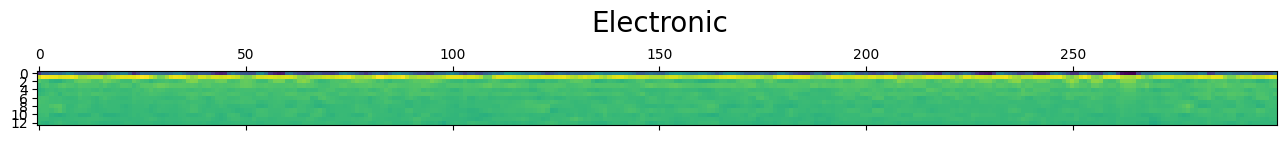

<Figure size 1700x500 with 0 Axes>

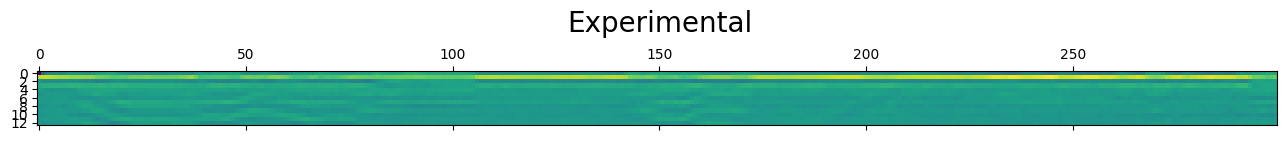

<Figure size 1700x500 with 0 Axes>

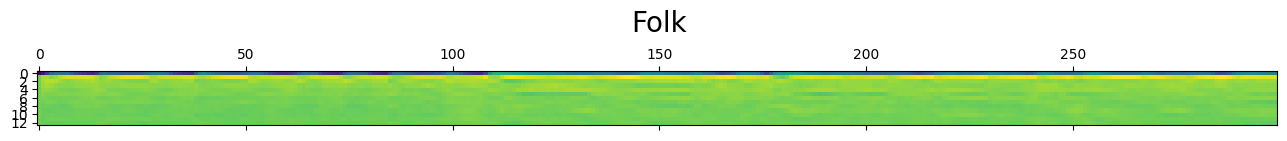

<Figure size 1700x500 with 0 Axes>

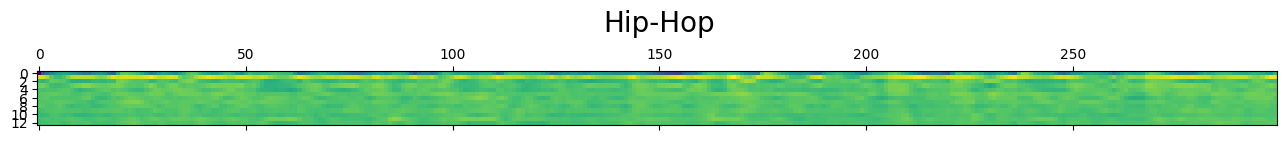

<Figure size 1700x500 with 0 Axes>

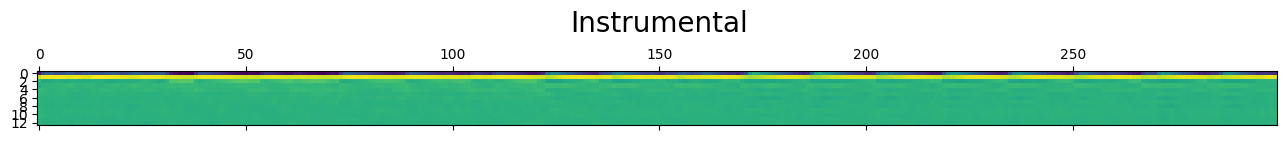

<Figure size 1700x500 with 0 Axes>

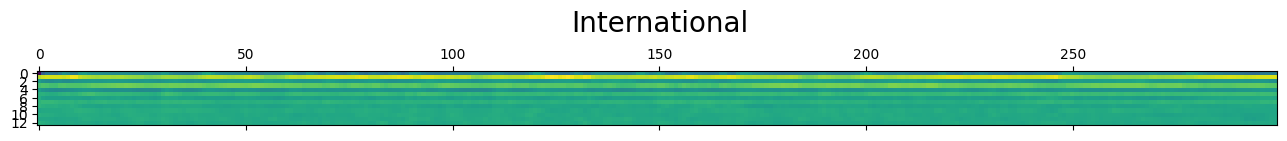

<Figure size 1700x500 with 0 Axes>

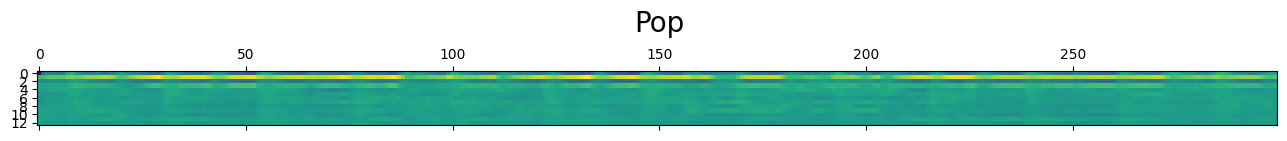

<Figure size 1700x500 with 0 Axes>

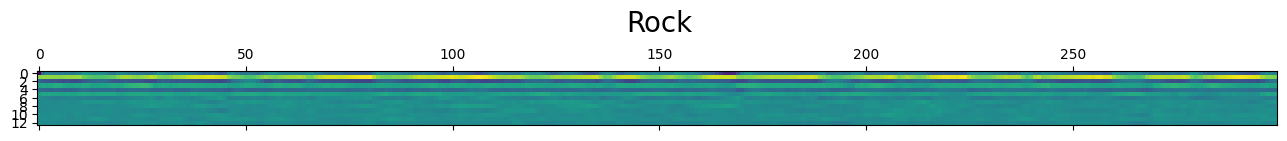

In [42]:
plt.rcParams['figure.figsize'] = (17, 5)
small_set = tracks['set', 'subset'] <= 'small'


# small set is consist of 8 genres and 8000 tracks.
# first from each genre, we select one track and visualize it.

# get the first track from each genre
tracks_small = tracks[small_set]

ipd.display(tracks_small['track'])
val_count = tracks_small['track', 'genre_top'].value_counts()

print(val_count)

# get non-zero genres and append name 
categories = []

for i in range(len(val_count)):
    if val_count.iloc[i] > 0: 
        categories.append(val_count.index[i])

print(categories)

# get the first track from each genre

for top_genre in categories:
    track_id = tracks_small[tracks_small['track', 'genre_top'] == top_genre]['track', 'genre_top'].index[0]
    path = fma_utils.get_audio_path(AUDIO_DIR, track_id)
    audio, sampling_freq = librosa.load(path)
    mfcc_features = librosa.feature.mfcc(y=audio, sr=sampling_freq, n_mfcc=13)

    plt.figure(figsize=(17, 5))
    plt.yscale = 'linear'
    plt.matshow(mfcc_features[:,:300])
    plt.text(150, -10, top_genre, horizontalalignment='center', fontsize=20)

    # plot mfcc features
    

    plt.show()


In [69]:
small = tracks['set', 'subset'] <= 'small'
genres = list(set(tracks[small]['track', 'genre_top']))


train = tracks['set', 'split'] == 'training'
validate = tracks['set', 'split'] == 'validation'
test = tracks['set', 'split'] == 'test'

X = features.loc[small, 'mfcc']
y = tracks.loc[small, ('track', 'genre_top')]

print('X:', X.shape, 'y:', y.shape)

y_train = tracks.loc[small & train, ('track', 'genre_top')]
y_test = tracks.loc[small & test, ('track', 'genre_top')]
X_train = features.loc[small & train, 'mfcc']
X_test = features.loc[small & test, 'mfcc']

print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_test:', X_test.shape, 'y_test:', y_test.shape)

ipd.display(y_train.head())
ipd.display(X_train.head())

genres

X: (8000, 140) y: (8000,)
X_train: (6400, 140) y_train: (6400,)
X_test: (800, 140) y_test: (800,)


track_id
2      Hip-Hop
5      Hip-Hop
10         Pop
140       Folk
141       Folk
Name: (track, genre_top), dtype: category
Categories (16, object): ['Blues', 'Classical', 'Country', 'Easy Listening', ..., 'Pop', 'Rock', 'Soul-RnB', 'Spoken']

statistics  kurtosis                                                    \
number            01        02        03        04        05        06   
track_id                                                                 
2           3.856789  1.541901  0.000816  0.330728  0.118731 -0.342687   
5           2.624517  2.415293  0.440233 -0.782131 -0.771069 -0.724216   
10          5.076893  1.161854  2.095651  1.372743 -0.203574 -0.345354   
140         0.384906  1.203378  0.429393  0.639471 -0.080144 -0.440946   
141        -0.038922  4.771146 -0.378949 -0.309047 -0.661308 -0.531602   

statistics                                          ...        std            \
number            07        08        09        10  ...         11        12   
track_id                                            ...                        
2          -0.259252  0.146735  0.410656 -0.162872  ...  10.059609  8.601942   
5           0.090260  0.152119  0.261731 -0.608905  ...   8.863638  9.581952   
10         -0.529139  0.561974  0.281350 -0.150672  ...   8.289734  7.985110   
140        -0.432567 -0.126163  0.507695  0.408915  ...   9.883532  8.250456   
141         0.029186  0.662524 -0.084562  0.965640  ...   9.464321  8.119837   

statistics                                                              \
number            13        14        15        16        17        18   
track_id                                                                 
2           9.284250  9.245516  8.520863  8.560472  7.651871  7.246555   
5           8.895723  8.141456  8.201844  7.780963  7.132692  7.539753   
10          7.075400  6.972649  7.071393  7.270959  7.051070  6.928591   
140         8.085891  8.114858  8.832722  8.157245  7.297486  7.734456   
141         8.918522  8.059117  9.339061  8.451561  8.426965  8.341757   

statistics                      
number            19        20  
track_id                        
2           7.077188  7.391859  
5           8.452527  7.334442  
10          6.430473  6.186294  
140         7.807103  7.986255  
141         8.572934  9.351485  

[5 rows x 140 columns]

['Electronic',
 'Rock',
 'Hip-Hop',
 'Folk',
 'Experimental',
 'Pop',
 'Instrumental',
 'International']

In [49]:
# train model for each genre
X_train_genre = []
y_train_genre = []
# ipd.display(y_train.head())
# ipd.display(X_train.head())
for genre in genres:
    X_train_genre.append(X_train[y_train == genre])
    y_train_genre.append(y_train[y_train == genre])

X_test_genre = []
y_test_genre = []
for genre in genres:
    X_test_genre.append(X_test[y_test == genre])
    y_test_genre.append(y_test[y_test == genre])

for i in range(len(genres)):
    print(genres[i], X_train_genre[i].shape, y_train_genre[i].shape)

ipd.display(X_train_genre[4])
ipd.display(y_train_genre[2])

Electronic (800, 140) (800,)
Rock (800, 140) (800,)
Hip-Hop (800, 140) (800,)
Folk (800, 140) (800,)
Experimental (800, 140) (800,)
Pop (800, 140) (800,)
Instrumental (800, 140) (800,)
International (800, 140) (800,)


statistics   kurtosis                                                     \
number             01         02        03        04        05        06   
track_id                                                                   
424          8.306672  13.110589  3.693924 -0.629891  0.338677  0.026408   
615          1.531756   1.362907 -0.501925 -1.258910 -0.769211 -0.471943   
897          0.730708  -0.464122  0.547002 -0.572762 -0.163763 -1.111045   
995         12.874648   7.768281  9.355810  9.233279  9.520746  0.206504   
997          3.901561  -0.006839  7.182126  0.059583  1.782549  0.823224   
...               ...        ...       ...       ...       ...       ...   
149775       0.694115   8.074207 -0.493086 -0.037101  0.002216  0.038953   
149776       3.318226   8.242123  0.563712 -0.286371  0.014421  0.371400   
149777       7.832159   6.273711  0.892596 -0.317202 -0.099253 -0.131475   
149778       4.115294   9.977690 -0.896044 -0.873688 -0.276804  0.155161   
149842       6.405128  10.580743  0.949712  2.654643  0.514446  0.057066   

statistics                                          ...        std            \
number            07        08        09        10  ...         11        12   
track_id                                            ...                        
424         0.143988 -0.867742 -0.424186 -0.171516  ...  10.582199  8.419143   
615        -1.168739 -1.081780 -1.037305 -1.163559  ...   7.087597  8.228360   
897        -0.071239 -0.842246 -0.193956 -0.736567  ...   8.152773  9.944097   
995         1.974014  2.938779  5.239470  6.268664  ...   5.732162  5.359702   
997         1.311295  0.423689  2.317173  1.134945  ...  12.145119  7.583594   
...              ...       ...       ...       ...  ...        ...       ...   
149775      0.530855  1.299737  1.736268  0.325865  ...   8.565717  8.213004   
149776      1.361838  2.135915  1.231705  0.292484  ...   9.176006  8.466194   
149777     -0.053438 -0.295503 -0.384571 -0.259436  ...   8.951296  9.753661   
149778     -0.068471 -0.677131  0.025796 -0.455227  ...   7.943717  7.660988   
149842     -0.109194 -0.030021  0.510349  0.504104  ...   6.930737  7.011874   

statistics                                                                \
number            13        14         15         16        17        18   
track_id                                                                   
424         9.071346  6.044075   6.787493   5.081655  7.771067  5.574942   
615         6.211649  9.724113  13.974810  12.418607  8.885660  7.826476   
897         7.760215  7.786842   7.049284   9.103047  6.671444  6.409741   
995         4.630705  5.390913   5.664444   4.248168  4.849566  4.207748   
997         7.111025  8.146393   6.034389   6.621936  6.976417  5.010584   
...              ...       ...        ...        ...       ...       ...   
149775      8.092328  7.589317   8.105069   7.324870  6.940079  7.139294   
149776      7.525866  8.474570   9.646421   7.200181  7.051109  7.072626   
149777      8.670220  8.047304   9.428265   6.481634  6.097892  7.199221   
149778      5.563481  6.115774   8.951204   5.883627  6.382901  7.138523   
149842      6.651159  6.445838   6.081506   6.159665  5.885157  6.203936   

statistics                      
number            19        20  
track_id                        
424         5.834515  6.514511  
615         7.617489  5.118920  
897         7.577559  6.680731  
995         4.187279  3.975750  
997         5.946360  5.362240  
...              ...       ...  
149775      7.090259  8.562508  
149776      6.746940  6.329108  
149777      6.783731  8.222892  
149778      6.779272  5.556543  
149842      5.755491  5.829596  

[800 rows x 140 columns]

track_id
2         Hip-Hop
5         Hip-Hop
676       Hip-Hop
694       Hip-Hop
695       Hip-Hop
           ...   
149953    Hip-Hop
152543    Hip-Hop
152545    Hip-Hop
153337    Hip-Hop
155066    Hip-Hop
Name: (track, genre_top), Length: 800, dtype: category
Categories (16, object): ['Blues', 'Classical', 'Country', 'Easy Listening', ..., 'Pop', 'Rock', 'Soul-RnB', 'Spoken']

In [50]:
import hmm_trainer as hmm_trainer
import tqdm as tqdm
# train model for each genre
print(len(genres))
models = []
for i in tqdm.tqdm(range(len(genres))):
    
    model = hmm_trainer.HMMTrainer(model_name='GaussianHMM', n_component=4)
    feature = np.array(X_train_genre[i]).reshape(-1, 1)
    model.train(feature)
    models.append((genres[i], model))

# test model for each model and select the best one as its genre
y_pred = []
for i in range(len(X_test)):
    best_score = float('-inf')
    pred_genre = None
    for j in range(len(genres)):
        feature = np.array(X_test.iloc[i]).reshape(-1, 1)
        score = models[j][1].get_score(feature)
        if score > best_score:
            best_score = score
            pred_genre = models[j][0]
    y_pred.append(pred_genre)

# calculate accuracy
accuracy = sum(y_pred == y_test) / len(y_test)
accuracy

8


100%|██████████| 8/8 [01:23<00:00, 10.44s/it]


0.255

#### cross vaildation

In [77]:

best_accuracy = 0
best_n_component = None
best_pred = None
n_component_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  

for n_component in n_component_values:
    models = []
    for i in tqdm.tqdm(range(len(genres))):
        
        model = hmm_trainer.HMMTrainer(model_name='GaussianHMM', n_component=n_component)
        feature = np.array(X_train_genre[i]).reshape(-1, 1)
        model.train(feature)
        models.append((genres[i], model))

    # test model for each model and select the best one as its genre
    y_pred = []
    for i in range(len(X_test)):
        best_score = float('-inf')
        pred_genre = None
        for j in range(len(genres)):
            feature = np.array(X_test.iloc[i]).reshape(-1, 1)
            score = models[j][1].get_score(feature)
            if score > best_score:
                best_score = score
                pred_genre = models[j][0]
        y_pred.append(pred_genre)

        
    accuracy = sum(y_pred == y_test) / len(y_test)
    if accuracy > best_accuracy:
        best_n_component = n_component
        best_accuracy = accuracy
        best_pred = y_pred

# calculate accuracy
best_accuracy, best_n_component


100%|██████████| 8/8 [11:09<00:00, 83.68s/it] 


(0.27125, 3)

In [81]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.48 0.17 0.18 0.04 0.   0.01 0.04 0.08]
 [0.06 0.48 0.15 0.04 0.01 0.08 0.05 0.13]
 [0.41 0.04 0.45 0.05 0.   0.   0.01 0.04]
 [0.09 0.19 0.   0.08 0.   0.12 0.15 0.37]
 [0.22 0.21 0.06 0.12 0.   0.02 0.17 0.2 ]
 [0.26 0.31 0.16 0.1  0.   0.03 0.03 0.11]
 [0.04 0.09 0.05 0.14 0.   0.04 0.35 0.29]
 [0.11 0.14 0.14 0.16 0.   0.03 0.07 0.35]]


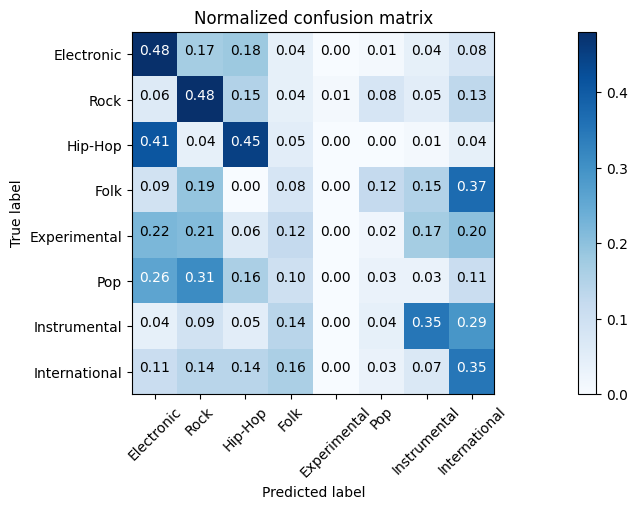

In [82]:
# plot confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=genres)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=genres, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [34]:
subset = tracks.index[tracks['set', 'subset'] <= 'small']
assert subset.isin(tracks.index).all()
assert subset.isin(features.index).all()

features_all = features.join(echonest, how='inner').sort_index(axis=1)
print('Not enough Echonest features: {}'.format(features_all.shape))

tracks = tracks.loc[subset]
features_all = features.loc[subset]

tracks.shape, features_all.shape

Not enough Echonest features: (13129, 767)


((8000, 52), (8000, 518))

In [35]:
train = tracks.index[tracks['set', 'split'] == 'training']
val = tracks.index[tracks['set', 'split'] == 'validation']
test = tracks.index[tracks['set', 'split'] == 'test']

print('{} training examples, {} validation examples, {} testing examples'.format(*map(len, [train, val, test])))

genres = list(LabelEncoder().fit(tracks['track', 'genre_top']).classes_)
#genres = list(tracks['track', 'genre_top'].unique())
print('Top genres ({}): {}'.format(len(genres), genres))
genres = list(MultiLabelBinarizer().fit(tracks['track', 'genres_all']).classes_)
print('All genres ({}): {}'.format(len(genres), genres))

6400 training examples, 800 validation examples, 800 testing examples
Top genres (8): ['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Pop', 'Rock']
All genres (114): [1, 2, 6, 10, 12, 15, 16, 17, 18, 21, 22, 25, 26, 27, 30, 31, 32, 33, 36, 38, 41, 42, 45, 46, 47, 49, 53, 58, 64, 66, 70, 71, 76, 77, 79, 81, 83, 85, 86, 88, 89, 90, 92, 94, 98, 100, 101, 102, 103, 107, 109, 111, 113, 117, 118, 125, 130, 167, 171, 172, 174, 177, 180, 181, 182, 183, 184, 185, 186, 214, 224, 232, 236, 240, 247, 250, 267, 286, 296, 297, 314, 337, 359, 360, 361, 362, 400, 401, 404, 439, 440, 456, 468, 491, 495, 502, 504, 514, 524, 538, 539, 542, 580, 602, 619, 695, 741, 763, 808, 811, 1032, 1060, 1193, 1235]


In [36]:
def pre_process(tracks, features, columns, multi_label=False, verbose=False):
    if not multi_label:
        # Assign an integer value to each genre.
        enc = LabelEncoder()
        labels = tracks['track', 'genre_top']
        #y = enc.fit_transform(tracks['track', 'genre_top'])
    else:
        # Create an indicator matrix.
        enc = MultiLabelBinarizer()
        labels = tracks['track', 'genres_all']
        #labels = tracks['track', 'genres']

    # Split in training, validation and testing sets.
    y_train = enc.fit_transform(labels[train])
    y_val = enc.transform(labels[val])
    y_test = enc.transform(labels[test])
    X_train = features.loc[train, columns].values
    X_val = features.loc[val, columns].values
    X_test = features.loc[test, columns].values
    
    X_train, y_train = shuffle(X_train, y_train, random_state=42)
    
    # Standardize features by removing the mean and scaling to unit variance.
    scaler = StandardScaler(copy=False)
    scaler.fit_transform(X_train)
    scaler.transform(X_val)
    scaler.transform(X_test)
    
    return y_train, y_val, y_test, X_train, X_val, X_test

In [37]:
y_train, y_val, y_test, X_train, X_val, X_test = pre_process(tracks, features_all, ['mfcc'], True)
y_train.shape, X_train.shape

((6400, 114), (6400, 140))